<a href="https://colab.research.google.com/github/revathithollikonda/gitdemo/blob/main/Regularization_on_Multiclass_classification_using_reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import reuters

In [ ]:
(train_X, train_Y), (test_X, test_Y) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
from keras.utils import to_categorical

def OneHotEncoding_fn(ReutersData, dimension=10000):

    OneHotEncoded_Data = np.zeros((len(ReutersData), dimension))
    for i, sequence in enumerate(ReutersData):

        OneHotEncoded_Data[i, sequence] = 1.
    return OneHotEncoded_Data

x_train = OneHotEncoding_fn(train_X)
x_test = OneHotEncoding_fn(test_X)

y_train = to_categorical(train_Y)
y_test = to_categorical(test_Y)

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()

model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu', input_shape=(10000,)))

model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:800]
X_train_without_val = x_train[800:]
y_validation = y_train[:800]
y_train_without_val = y_train[800:]


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
16/16 [==============================] - 2s 74ms/step - loss: 7.2040 - categorical_accuracy: 0.4769 - val_loss: 3.7330 - val_categorical_accuracy: 0.5462
Epoch 2/25
16/16 [==============================] - 1s 48ms/step - loss: 3.3957 - categorical_accuracy: 0.5572 - val_loss: 3.1315 - val_categorical_accuracy: 0.5938
Epoch 3/25
16/16 [==============================] - 1s 51ms/step - loss: 3.0352 - categorical_accuracy: 0.6143 - val_loss: 2.8676 - val_categorical_accuracy: 0.6263
Epoch 4/25
16/16 [==============================] - 1s 90ms/step - loss: 2.8418 - categorical_accuracy: 0.6459 - val_loss: 2.7100 - val_categorical_accuracy: 0.6675
Epoch 5/25
16/16 [==============================] - 1s 93ms/step - loss: 2.6936 - categorical_accuracy: 0.6628 - val_loss: 2.5910 - val_categorical_accuracy: 0.6737
Epoch 6/25
16/16 [==============================] - 1s 63ms/step - loss: 2.5763 - categorical_accuracy: 0.6699 - val_loss: 2.4947 - val_categorical_accuracy: 0.6800
Epoch 7/25

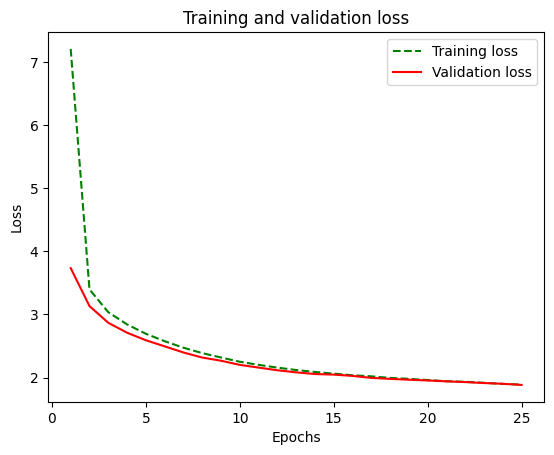

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

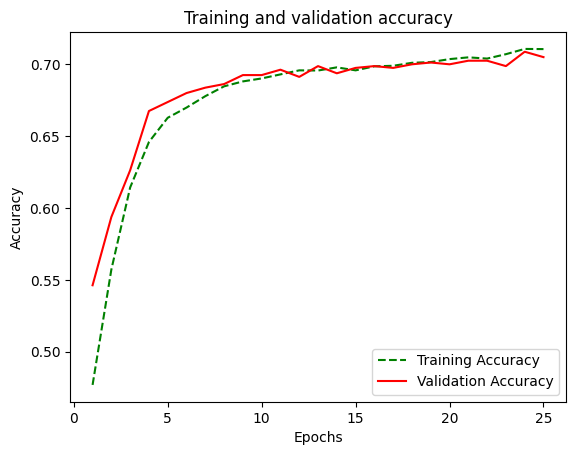

In [ ]:
plt.clf()
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
